In [36]:
from math import log
from random import random


class Base(dict):
    """Container for Stochastic Simulation Algorithms (SSA)"""

    def __init__(
        self,
        initial_conditions,
        propensities,
        stoichiomemtry
    ):
        """Initialize SSA"""
        self._propen = sorted(propensities.items(), reverse=True)
        self._stoich = sorted(stoichiometry.items(), reverse=True)
        self._exclud = dict(propen=list(), stoich=list())
        super().__init__(**initial_conditions)
        
    def direct(self):
        """Indefinite generator of direct-method trajectories"""
        while True:
            while not self.exit():
                
                # init step: evaluate propensities and partition
                weights = list((k, v(self)) for k,v in self.propen)
                partition = sum(tup[1] for tup in weights)
                
                # monte carlo step 1: next reaction time
                sojourn = log(1.0 / random()) / partition
                self["time"].append(
                    self["time"][-1] + sojourn
                )
                
                # monte carlo step 2: next reaction
                partition = partition * random()
                j = len(weights) - 1
                while partition >= 0.0:
                    partition -= weights.pop()[1]
                    j -= 1
                    
                # final step: update reaction species
                for species, delta in self.stoich[j][1].items():
                    self[species].append(
                        self[species][-1] + delta
                    )
                    
            yield self
            for key in self:
                del self[key][1:]
        
    def first_reaction(self):
        """Indefinite generator of 1st-reaction trajectories"""
        while True:
            while not self.exit():

                # monte carlo step: generate reaction times
                times = list(
                    (k,  log(1.0 / random()) / v(model))
                    for k,v in self.propen
                ).sort(key=lambda t: t[1])

                # update next reaction time
                model["time"].append(times[0][1])

                # update reaction species
                reaction_stoich = self.stoich[times[0][0]]
                for species, delta in reaction_stoich:
                    self[species] += delta
                    
            yield self
            for key in self:
                del self[key][1:]
            
    def exit(self, *args, **kwargs):
        """Break out of trajectory on conditions"""
        raise NotImplementedError
        
    @property
    def propen(self):
        """Return valid propensities"""
        for rxn, pro in self._propen:
            if pro(self) <= 10**(-8):
                self.exclud["propen"].append(
                    self._propen.pop(rxn)
                )
        for rxn, pro in self._exclud["prop"]:
            if pro(self) > 10**(-8):
                self._propen.append(
                    self._propen.append((rxn, pro))
                )
        return self._propen.sort(reverse=True)
        
    @property
    def stoich(self):
        """Return valid stoichiometries"""
        for key in self:
            for rxn, sto in self._stoich:
                if self[key]
            
        return self._stoich.sort(reverse=True)
        

In [37]:
class Epidemic(Base):
    """Epidemic without vital dynamics"""
    
    def exit(self):
        if self["i"] == 0:
            if self["r"][-1] == 300:
                return True
            elif self["s"][-1] > 0:
                self.reset()
                return False
        return False

In [38]:
# initial species counts and sojourn times
initital_conditions = {
    "s": [290],
    "i": [10],
    "r": [0],
    "time": [0.0],
}


# propensity functions
propensities = {
    0: lambda d: 3.0 * d["s"][-1] * d["i"][-1] / 300,
    1: lambda d: 5.0 * d["i"][-1],
}


# change in species for each propensity
stoichiometry = {
    0: {"s": -1, "i": 1, "r": 0},
    1: {"s": 0, "i": -1, "r": 1},
}


{'s': [290, 289, 289, 288, 287, 287, 286, 285, 284, 283, 282, 281, 280, 280, 279, 278, 277, 276, 275, 274, 274, 273, 273, 272, 272, 271, 271, 271, 270, 269, 268, 267, 266, 265, 265, 264, 264, 264, 264, 263, 262, 261, 260, 259, 258, 257, 256, 255, 254, 253, 252, 251, 251, 250, 250, 249, 248, 247, 247, 246, 245, 244, 243, 242, 242, 242, 241, 240, 239, 238, 237, 236, 236, 235, 235, 234, 233, 233, 232, 231, 230, 230, 229, 228, 228, 227, 226, 226, 226, 225, 224, 223, 223, 222, 221, 220, 219, 218, 218, 218, 218, 218, 217, 217, 216, 215, 214, 214, 213, 213, 212, 211, 210, 209, 208, 207, 207, 207, 206, 205, 205, 205, 205, 204, 203, 202, 202, 201, 200, 199, 198, 198, 197, 196, 195, 194, 193, 192, 191, 190, 190, 189, 188, 188, 188, 188, 188, 187, 187, 187, 186, 185, 185, 184, 183, 182, 182, 181, 180, 179, 178, 177, 177, 176, 175, 174, 173, 172, 172, 171, 170, 169, 168, 167, 166, 165, 164, 164, 163, 162, 161, 161, 160, 159, 158, 157, 156, 155, 154, 153, 153, 152, 151, 150, 149, 148, 147, 147, 146

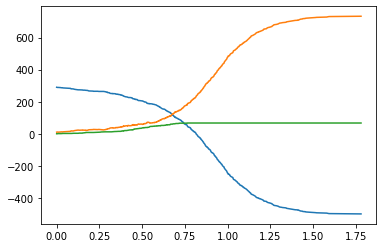

In [39]:
from matplotlib import pyplot, rcParams


# make figure 10" x 3", 200 dots per inch
# rcParams["figure.figsize"] = 10, 3
# rcParams["figure.dpi"] = 200


# # instantiate figure and axes
# figure, axes = pyplot.subplots(1, 3)


# append trajectories to plot
epidemic = Epidemic(
    initital_conditions,
    propensities,
    stoichiometry
)
trajectories = 0
for trajectory in epidemic.direct():
    pyplot.plot(trajectory["time"], trajectory["s"])
    pyplot.plot(trajectory["time"], trajectory["i"])
    pyplot.plot(trajectory["time"], trajectory["r"])
    trajectories += 1
    if trajectories == 1:
        break
pyplot.show()